# Choosing the Right k in k-Nearest Neighbors (k-NN)
### A Practical Guide with Python and the Iris Dataset

In this notebook, we explore how the number of neighbors (k) affects the performance of the k-NN classification algorithm using the Iris dataset.

We'll:
- Understand the intuition behind k-NN
- Train and evaluate models for various k values
- Visualize accuracy changes
- Analyze confusion matrices for insights


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


## Step 1: Load the Iris Dataset


In [10]:
X, y = load_iris(return_X_y=True)
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")


Feature matrix shape: (150, 4)
Target vector shape: (150,)


## Step 2: Train-Test Split
We use 70% of the data for training and 30% for testing.


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


## Step 3: Feature Scaling
Standardizing the features is important for distance-based models.


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Step 4: Train and Evaluate k-NN for k = 1 to 20


In [20]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.4f}")


k = 1, Accuracy = 0.9333
k = 2, Accuracy = 0.8889
k = 3, Accuracy = 0.9111
k = 4, Accuracy = 0.9111
k = 5, Accuracy = 0.9111
k = 6, Accuracy = 0.9111
k = 7, Accuracy = 0.9333
k = 8, Accuracy = 0.9111
k = 9, Accuracy = 0.9556
k = 10, Accuracy = 0.9333
k = 11, Accuracy = 0.9556
k = 12, Accuracy = 0.9556
k = 13, Accuracy = 0.9333
k = 14, Accuracy = 0.9556
k = 15, Accuracy = 0.9333
k = 16, Accuracy = 0.9111
k = 17, Accuracy = 0.9111
k = 18, Accuracy = 0.9111
k = 19, Accuracy = 0.9111
k = 20, Accuracy = 0.8889


## Step 5: Plot Accuracy vs. k


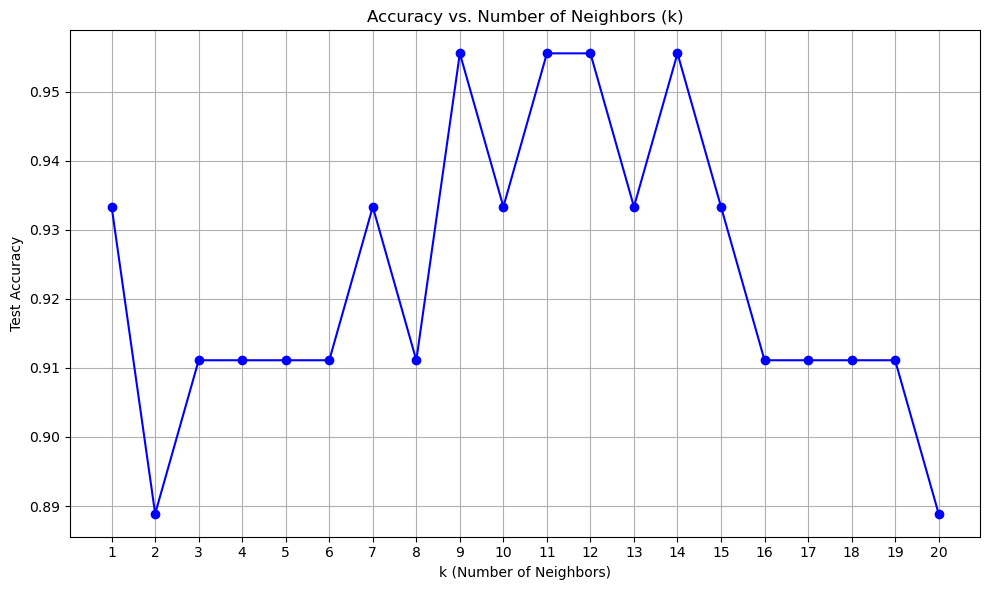

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Test Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 6: Confusion Matrices for Selected k Values
Let's visualize how k = 3 and k = 10 differ in class-level performance.


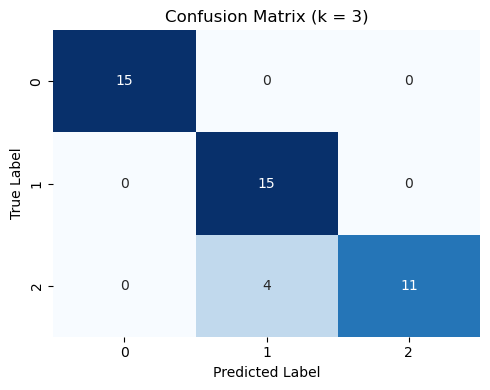

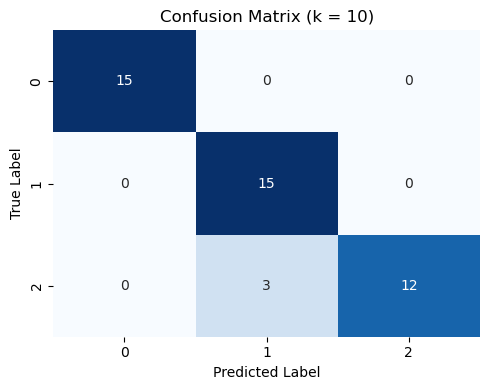

In [26]:
for k in [3, 10]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix (k = {k})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()
